* Julia code replication of:
" https://www.kaggle.com/victorchernozhukov/r-notebook-linear-penalized-regs "



This notebook contains an example for teaching.


# Penalized Linear Regressions: A Simulation Experiment

## Data Generating Process: Approximately Sparse

In [174]:
# #Needed Packages and extra just in case
# Pkg.add( "GLMNet" )
# Pkg.add("Plots")
# Pkg.add("Lathe")
# Pkg.add("GLM")
# Pkg.add("StatsPlots")
# Pkg.add("MLBase")
# Pkg.add("CSV")
# Pkg.add("DataFrames")
# Pkg.add("Dates")
# Pkg.add("Plots")
# Pkg.add("Lasso")
# Pkg.add( "Distributions" )

In [175]:
using Pkg
using CSV
using DataFrames
using Dates
using Plots

# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

using Lasso

# Import functions
using LinearAlgebra, GLM, DataFrames, Statistics, Random

using Distributions

using GLMNet

In [171]:
Random.seed!(1234)

TaskLocalRNG()

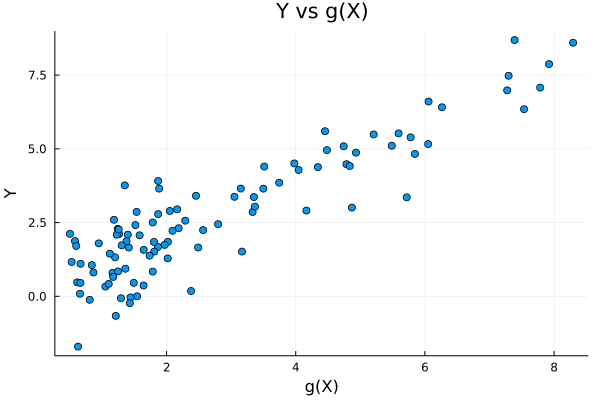

theoretical R2:0.9116449856603569

In [176]:
n = 100
p = 400
Z = rand( Uniform( 0, 1 ), n  ) .- 0.5
W = reshape( rand( Uniform( 0, 1 ), n * p  ), n, p )

beta = ( 1 ./ range( 1, p, step = 1 ) ) .^ 2

gX = exp.( Z .* 4  ) + W * beta

X = hcat( Z, Z .^ 2, Z .^ 3, W )

mean = 0
sd = 1

Y = gX + randn( n )

print( "theoretical R2:", var(gX) / var( Y ) )

plt = plot( gX, Y, 
    seriestype = :scatter, 
    title = "Y vs g(X)",
    label = "", 
    lw = 3)
xlabel!( "g(X)" )
ylabel!( "Y" )
display( plt )


We use package Glmnet to carry out predictions using cross-validated lasso, ridge, and elastic net

In [ ]:
fit_lasso_cv = glmnetcv(X, Y, alpha = 1)
fit_ridge   = glmnetcv(X, Y, alpha=0)
fit_elnet   = glmnetcv(X, Y, alpha=.5)

yhat_lasso_cv = GLMNet.predict( fit_lasso_cv, X )
yhat_ridge = GLMNet.predict( fit_ridge, X )
yhat_elnet = GLMNet.predict( fit_elnet, X )

data = DataFrame( lasso_cv = ( gX - yhat_lasso_cv ) .^ 2, 
                  ridge = ( gX - yhat_ridge ) .^ 2, 
                elnet = ( gX - yhat_elnet ) .^ 2 )

lasso_mse_fit = fit( LinearModel, @formula( lasso_cv ~ 1 ), data )
ridge_mse_fit = fit( LinearModel, @formula( ridge ~ 1 ), data )
elnet_mse_fit = fit( LinearModel, @formula( elnet ~ 1 ), data )

MSE_lasso_cv  = [ GLM.coef( lasso_mse_fit )[ 1 ], stderror( lasso_mse_fit )[1] ]
MSE_ridge  = [ GLM.coef( ridge_mse_fit )[ 1 ], stderror( ridge_mse_fit )[1] ]
MSE_elnet  = [ GLM.coef( elnet_mse_fit )[ 1 ], stderror( elnet_mse_fit )[1] ]

Here we compute the lasso and ols post lasso using plug-in choices for penalty levels, using package hdm

Next we code up lava, which alternates the fitting of lasso and ridge

There is no index in DataFrames in Julia. [Explanation here](https://stackoverflow.com/questions/64689023/is-it-possible-to-set-a-chosen-column-as-index-in-a-julia-dataframe)

In [237]:
Pkg.add( "Latexify" )

   Resolving package versions...
    Updating `C:\Users\Anzony\.julia\environments\v1.7\Project.toml`
  [23fbe1c1] + Latexify v0.15.12
  No Changes to `C:\Users\Anzony\.julia\environments\v1.7\Manifest.toml`


In [238]:
using Latexify

In [180]:
table = zeros( Float64, 6, 2 )
table[1,1:2] = MSE_lasso_cv
table[2,1:2] = MSE_ridge
table[3,1:2] = MSE_elnet
table[4,1:2] = MSE_lasso
table[5,1:2] = MSE_lasso_post
table[6,1:2] = MSE_lava

df = DataFrame( hcat( [ "Cross-Validated Lasso", 
                        "Cross-Validated ridge", 
                        "Cross-Validated elnet",
                        "Lasso", 
                        "Post-Lasso","Lava" ], table 
                    ) , 
                [ "Model", "MSA", "S.E. for MSA" ] )


6×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [245]:
Latexify.set_default(; starred=true)

AssertionError: latexify does not support objects of type DataFrame.

In [268]:
latexify( df , env= :raw )|> print

LoadError: AssertionError: latexify does not support objects of type DataFrame.

In [228]:
DataFrame(grp=repeat(1:2, 3), x=6:-1:1, y=4:9, z=[3:7; missing], id='a':'f')

,grp,x,y,z,id
,Int64,Int64,Int64,Int64?,Char
1,1,6,4,3,a
2,2,5,5,4,b
3,1,4,6,5,c
4,2,3,7,6,d
5,1,2,8,7,e
6,2,1,9,missing,f


In [227]:
methods( df )

# 0 methods: